In [2]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\sravy\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\sravy\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\sravy\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\sravy\anaconda3\Lib\site-packages\setuptools\_v

In [3]:
pip install --upgrade setuptools

   ---------------------------------------- 0.0/894.6 kB ? eta -:--:--
   - -------------------------------------- 30.7/894.6 kB 1.3 MB/s eta 0:00:01
   ---------- ----------------------------- 245.8/894.6 kB 5.0 MB/s eta 0:00:01
   --------------------- ------------------ 481.3/894.6 kB 5.0 MB/s eta 0:00:01
   --------------------- ------------------ 481.3/894.6 kB 5.0 MB/s eta 0:00:01
   --------------------- ------------------ 481.3/894.6 kB 5.0 MB/s eta 0:00:01
   --------------------- ------------------ 481.3/894.6 kB 5.0 MB/s eta 0:00:01
   --------------------- ------------------ 481.3/894.6 kB 5.0 MB/s eta 0:00:01
   --------------------- ------------------ 481.3/894.6 kB 5.0 MB/s eta 0:00:01
   ------------------------ --------------- 553.0/894.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  890.9/894.6 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 894.6/894.6 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found exist

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.


In [1]:
import os
import time
import uuid
import cv2

In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [3]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    # cv2.imshow('frame', frame)
    time.sleep(0.5)

    # if cv2.waitKey(0) &0xFF: #== ord('q'):
    #     break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [6]:
%pip install conda-forge::tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'conda-forge::tensorflow'


In [4]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [6]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [7]:
images.as_numpy_iterator().next()

b'data\\images\\7de5f63f-0700-11ef-ade5-cc6b1e0bebec.jpg'

In [8]:
images = images.map(load_image)

In [9]:
images.as_numpy_iterator().next()

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [251, 253, 248],
        [251, 254, 247],
        [250, 253, 246]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [250, 252, 247],
        [251, 254, 247],
        [251, 254, 247]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [250, 252, 247],
        [251, 253, 248],
        [251, 253, 248]],

       ...,

       [[239, 240, 234],
        [240, 241, 235],
        [242, 245, 238],
        ...,
        [103,  77,  76],
        [ 98,  72,  71],
        [ 99,  75,  73]],

       [[242, 243, 235],
        [240, 241, 233],
        [241, 244, 237],
        ...,
        [109,  84,  80],
        [ 92,  68,  64],
        [ 86,  65,  60]],

       [[243, 244, 236],
        [238, 239, 231],
        [238, 241, 234],
        ...,
        [113,  89,  85],
        [105,  81,  77],
        [ 87,  66,  61]]

In [10]:
image_generator = images.batch(4).as_numpy_iterator()

In [11]:
plot_images = image_generator.next()

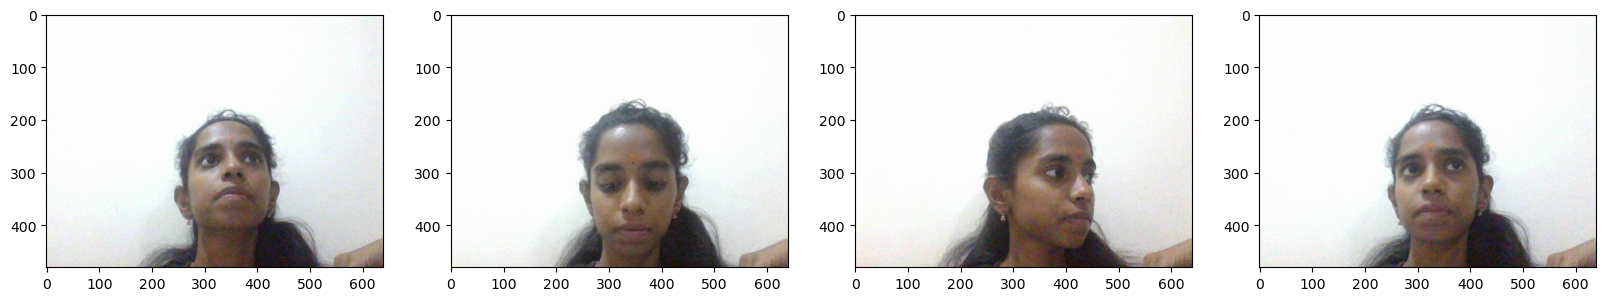

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [13]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)  

In [14]:
import albumentations as alb

In [15]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                        keypoint_params=alb.KeypointParams(format='xy', label_fields=['class_labels']))

In [20]:
for partition in ['train', 'test', 'val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        classes = [0,0]
        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
    
            if label['shapes'][0]['label']=='left': 
                classes[0] = 1
                coords[0] = np.squeeze(label['shapes'][0]['points'])[0]
                coords[1] = np.squeeze(label['shapes'][0]['points'])[1]

            if label['shapes'][0]['label']=='right':
                classes[1] = 1
                coords[2] = np.squeeze(label['shapes'][0]['points'])[0]
                coords[3] = np.squeeze(label['shapes'][0]['points'])[1]

            if len(label['shapes']) > 1:     
                if label['shapes'][1]['label'] =='left': 
                    classes[0] = 1 
                    coords[0] = np.squeeze(label['shapes'][1]['points'])[0]
                    coords[1] = np.squeeze(label['shapes'][1]['points'])[1]

                if label['shapes'][1]['label'] =='right': 
                    classes[1] = 1
                    coords[2] = np.squeeze(label['shapes'][1]['points'])[0]
                    coords[3] = np.squeeze(label['shapes'][1]['points'])[1]
            
            np.divide(coords, [640,480,640,480])
                
        try: 
            for x in range(30):
                keypoints = [(coords[:2]), (coords[2:])]
                augmented = augmentor(image=img, keypoints=keypoints, class_labels=['left','right'])
                cv2.imwrite(os.path.join('aug_data2', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image
                annotation['class'] = [0,0]
                annotation['keypoints'] = [0,0,0,0]

                if os.path.exists(label_path):
                    if len(augmented['keypoints']) > 0: 
                        for idx, cl in enumerate(augmented['class_labels']):
                            if cl == 'left': 
                                annotation['class'][0] = 1 
                                annotation['keypoints'][0] = augmented['keypoints'][idx][0]
                                annotation['keypoints'][1] = augmented['keypoints'][idx][1]
                            if cl == 'right': 
                                annotation['class'][1] = 1 
                                annotation['keypoints'][2] = augmented['keypoints'][idx][0]
                                annotation['keypoints'][3] = augmented['keypoints'][idx][1]
                                
                annotation['keypoints'] = list(np.divide(annotation['keypoints'], [450,450,450,450]))


                with open(os.path.join('aug_data2', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)